In [10]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

In [11]:
input_img = Input(shape=(28, 28, 1))

In [12]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoding = MaxPooling2D((2, 2), padding='same')(x)



x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoding)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoding = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [13]:
autoencoder = Model(input_img, decoding)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [14]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

In [15]:
autoencoder.fit(x_train, x_train,epochs=50,batch_size=128,shuffle=True,validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2312 - val_loss: 0.1784
Epoch 2/50
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1634 - val_loss: 0.1510
Epoch 3/50
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1483 - val_loss: 0.1439
Epoch 4/50
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1398 - val_loss: 0.1365
Epoch 5/50
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1332 - val_loss: 0.1280
Epoch 6/50
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1284 - val_loss: 0.1272
Epoch 7/50
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1253 - val_loss: 0.1201
Epoch 8/50
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1224 - val_loss: 0.1202
Epoch 9/50
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1203 - val_loss: 0.1187
Epoch

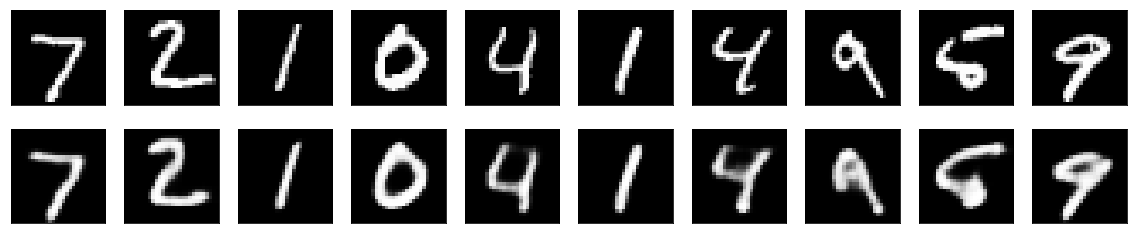

In [25]:
decoded_image= autoencoder.predict(x_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for i in range(10):
    sub= plt.subplot(2,10,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    sub.get_xaxis().set_visible(False)
    sub.get_yaxis().set_visible(False)
    
    sub= plt.subplot(2,10,i+10+1)
    plt.imshow(decoded_image[i].reshape(28,28))
    plt.gray()
    sub.get_xaxis().set_visible(False)
    sub.get_yaxis().set_visible(False)
plt.show()    